Found 588 images belonging to 18 classes.


c:\Users\varsa\anaconda3\envs\plantvillage\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step
📊 Classification Report:
                                  precision    recall  f1-score   support

                01_healthy_paddy       0.85      0.97      0.91        30
             02_leaf_blast_paddy       0.86      0.83      0.85        30
  03_bacterial_leaf_blight_paddy       1.00      0.90      0.95        30
               04_healthy_banana       0.97      1.00      0.98        30
               05_cordana_banana       1.00      1.00      1.00        30
              06_sigatoka_banana       1.00      0.93      0.97        30
            07_Healthy_sugarcane       0.86      1.00      0.92        30
             08_Mosaic_sugarcane       0.84      0.90      0.87        30
             09_RedRot_sugarcane       1.00      0.80      0.89        30
       10_healthy_leaf_groundnut       0.84      1.00      0.91        64
    11_early_leaf_spot_groundnut       1.00      0.63      0.78        30
               12_Rust_groundnut       1.00  

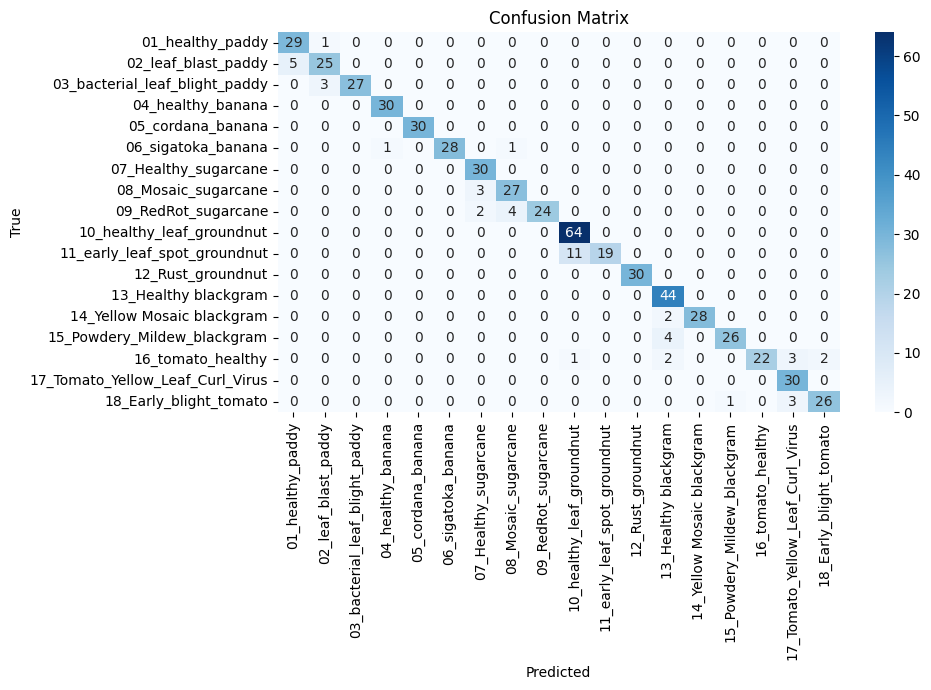

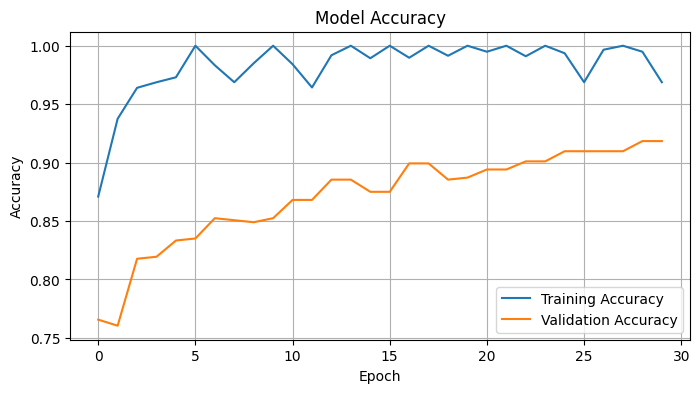

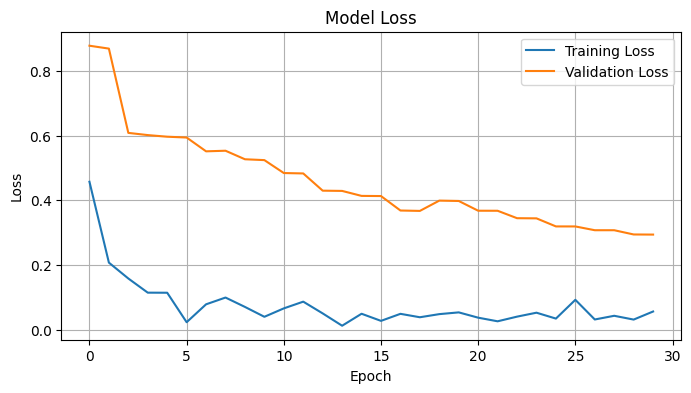

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import pickle

# Function to load model
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Function to load the validation data generator
def load_validation_generator(data_dir, target_size=(224, 224), batch_size=32, validation_split=0.2):
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=validation_split)
    return val_datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False,
        subset='validation'
    )

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_labels, save_path='../results/confusion_matrix.png'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Function to plot training history (Accuracy & Loss)
def plot_training_history(history, save_dir='../results/'):
    # Accuracy Plot
    plt.figure(figsize=(8, 4))
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(save_dir, 'accuracy_plot.png'))
    plt.show()

    # Loss Plot
    plt.figure(figsize=(8, 4))
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(save_dir, 'loss_plot.png'))
    plt.show()

# Main execution
def main():
    # Load model
    model = load_model('../models/mobilenetv2_model.h5')
    if not model:
        return
    
    # Load validation data generator
    validation_generator = load_validation_generator('../dataset/')
    
    # Predict
    Y_pred = model.predict(validation_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = validation_generator.classes
    class_labels = list(validation_generator.class_indices.keys())
    
    # Classification report
    print("📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_true, y_pred, class_labels)
    
    # Load training history from pickle file
    try:
        with open('../models/history.pkl', 'rb') as f:
            history = pickle.load(f)
    except Exception as e:
        print(f"Error loading training history: {e}")
        return
    
    # Plot training history
    plot_training_history(history)

if __name__ == "__main__":
    main()


In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.3/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.6 MB 728.2 kB/s eta 0:00:16
   - -------------------------------------- 0.5/11.6 MB 728.2 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.6 MB 671.3 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/11.6 MB 671.3 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/11.6 MB 671.0 kB/s eta 0:00:16
   --- ------------------------------------ 1.0/11.6 MB 671.0 kB/s eta 0:

In [4]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [5]:
pip install scikit-learn



  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
    --------------------------------------- 0.3/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 299.6 kB/s eta 0:00:36
   - -------------------------------------- 0.5/11.2 MB 299.6 kB/s eta 0:00:36
   -- ------------------------------------- 0.8/11.2 MB 381.3 kB/s eta 0:00:28
